# <font color='red'> **키, 몸무게, 발크기가  6, 130, 8인 경우는 남자인가 여자인가?**
## **[데이터 소스](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)**

In [1]:
import numpy as np
import pandas as pd

# Current DataFrame
data = {
    "Gender": ["male", "male", "male", "male", "female", "female", "female", "female"],
    "height": [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75],
    "weight": [180, 190, 170, 165, 100, 150, 130, 150],
    "foot_size": [12, 11, 12, 10, 6, 8, 7, 9]
}

df = pd.DataFrame(data)

# Generate 100 similar data points
np.random.seed(0)  # For reproducibility

# Generate similar data by adding small random noise
def generate_similar_data(df, num_samples=20):
    similar_data = []
    for _ in range(num_samples):
        for i, row in df.iterrows():
            gender = row['Gender']
            height = row['height'] + np.random.normal(0, 0.1)  # Small noise
            weight = row['weight'] + np.random.normal(0, 5)    # Small noise
            foot_size = row['foot_size'] + np.random.normal(0, 0.5)  # Small noise
            similar_data.append([gender, height, weight, foot_size])
    return pd.DataFrame(similar_data, columns=df.columns)

# Create the new DataFrame with similar data
df = generate_similar_data(df)

df.round(2)

,Gender,height,weight,foot_size
0,male,6.18,182.00,12.49
1,male,6.14,199.34,10.51
2,male,5.68,169.24,11.95
3,male,5.96,165.72,10.73
4,female,5.08,100.61,6.22
...,...,...,...,...
155,male,6.16,160.20,9.60
156,female,4.77,101.26,4.99
157,female,5.45,148.62,7.65
158,female,5.59,134.97,7.66


In [2]:
df.describe()

,height,weight,foot_size
count,160.000000,160.000000,160.000000
mean,5.641286,154.531910,9.287362
std,0.329919,27.627258,2.189135
min,4.771138,91.915220,4.952698
25%,5.451147,138.462105,7.391530
50%,5.700760,157.146527,9.546707
75%,5.906961,174.588993,11.310488
max,6.238314,201.519583,13.129654


<Axes: >

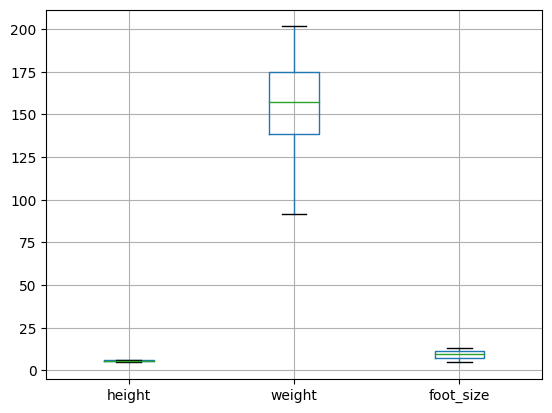

In [3]:
df.boxplot()

<Axes: >

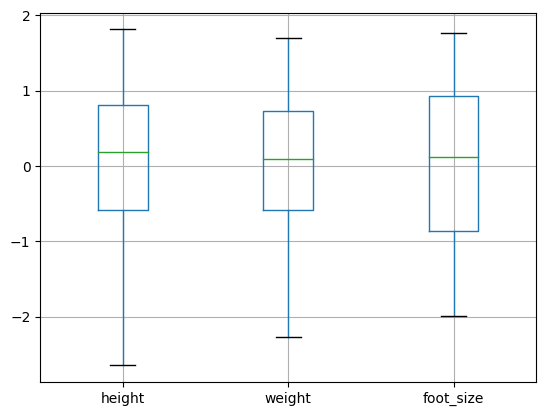

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Create a standard scaler object
scaler = StandardScaler()

# Fit the scaler to the numerical data
scaler.fit(numerical_df)

# Transform the numerical data and assign it to a new DataFrame
scaled_df = pd.DataFrame(scaler.transform(numerical_df), columns=numerical_df.columns)

# Plot the boxplot of the scaled data
scaled_df.boxplot()

In [5]:
features = df.drop('Gender', axis=1)
features.corr()

,height,weight,foot_size
height,1.000000,0.846051,0.785786
weight,0.846051,1.000000,0.884260
foot_size,0.785786,0.884260,1.000000


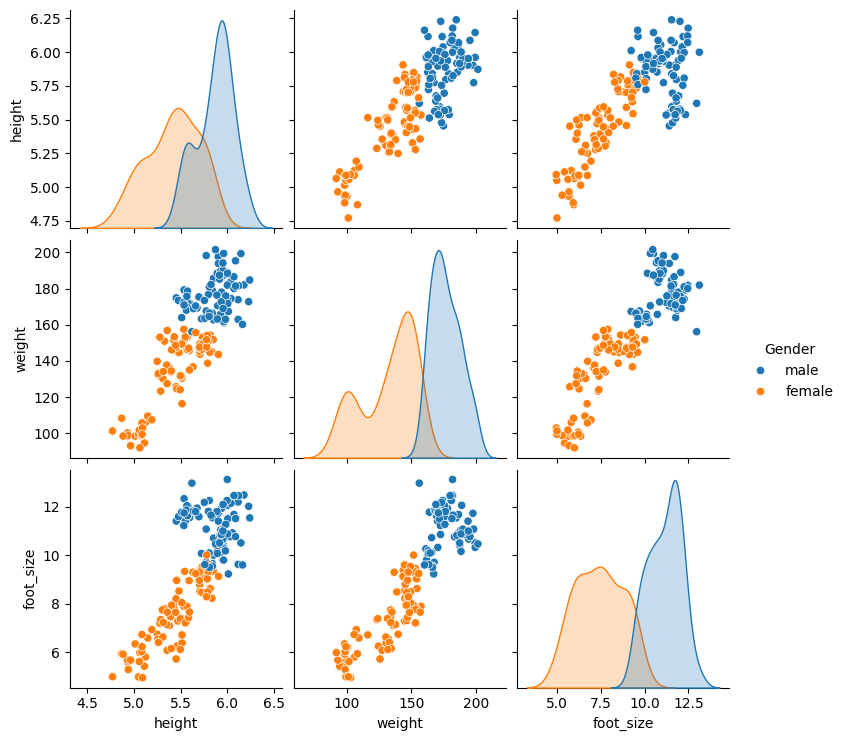

In [6]:
# prompt: pairplot seaborn
import seaborn as sns
sns.pairplot(df, hue="Gender")

## **키, 몸무게, 발크기가  6, 130, 8인 경우는 남자인가 여자인가?**
### **1. 단일변량(변수) 예측**

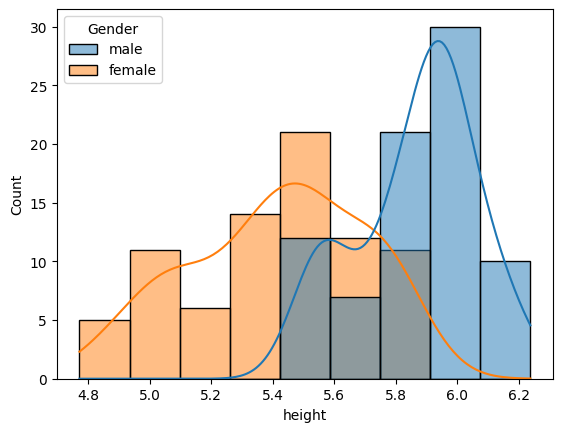

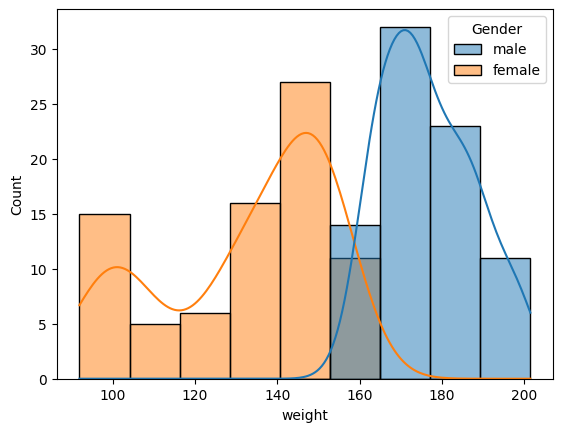

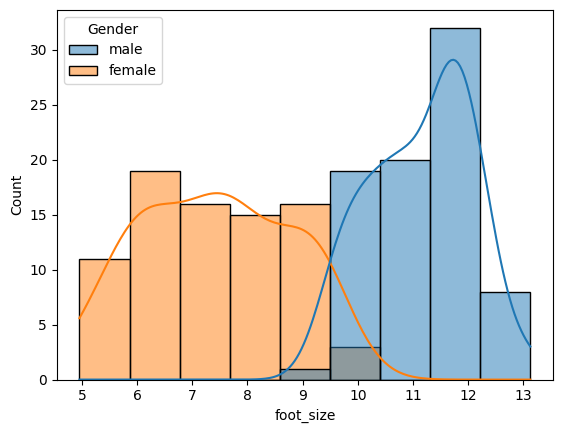

In [7]:
import matplotlib.pyplot as plt

for column in df.columns[1:]:
  sns.histplot(data=df, x=column, hue="Gender", kde=True)
  plt.show()

### **2. 다변량(변수) 예측**

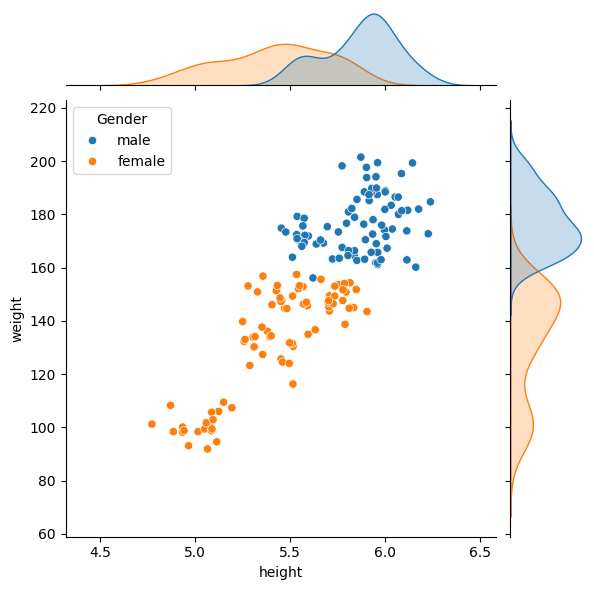

In [8]:
# prompt: 두변수의 jointplot으로

sns.jointplot(data=df, x="height", y="weight", hue="Gender")
plt.show()


<Axes: xlabel='height', ylabel='Count'>

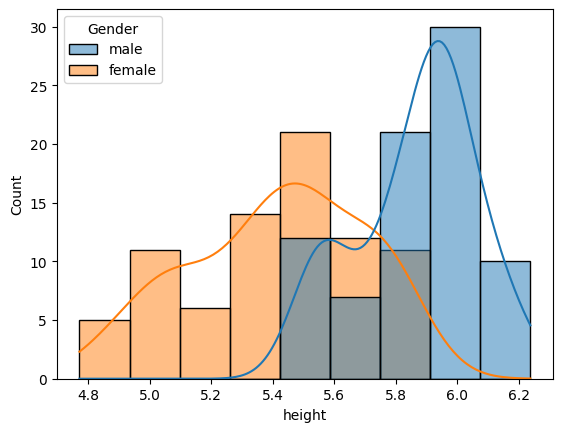

In [9]:
# prompt: height만으로 hue를  gender로 히스토그램을 그려줘 kde도 표시
sns.histplot(data=df, x="height", hue="Gender", kde=True)

### **3. 머신러닝 예측**

In [10]:
# prompt: gender를 예측하라 나머지변수로 decision tree로

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Gender', axis=1)
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 예측
new_data = [6, 130, 8]
prediction = model.predict([new_data])

print(f"예측된 성별: {prediction[0]}")


예측된 성별: female


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


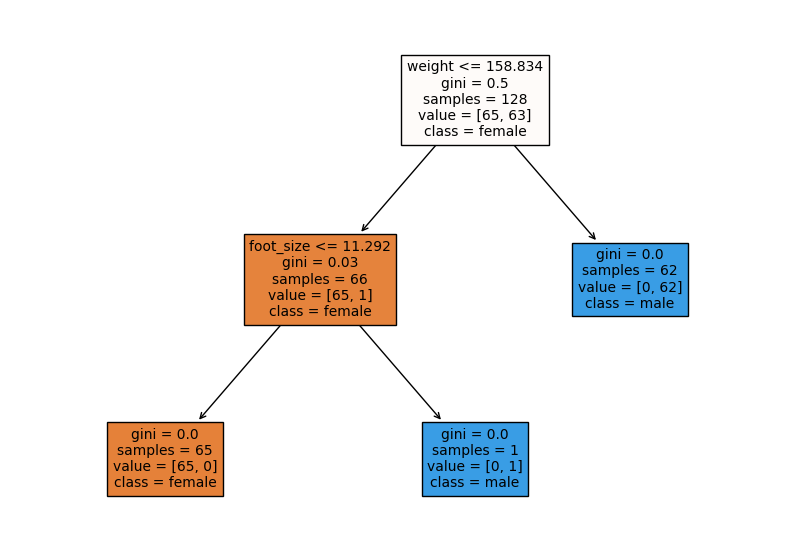

In [11]:
# prompt: plottree를 그려줘

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(model, feature_names=X.columns, class_names=["female", "male"], fontsize=10, filled=True)
plt.show()
